In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def get_audio_path(df, filename, dataset_path):
    sep = os.sep
    audio_dir = dataset_path + sep + 'audio' + sep
    audio_class = df.loc[df['filename'] == filename, 'class'].values[0]
    path = audio_dir + audio_class.astype(str) + sep + filename
    return path

In [3]:
dataset_path = '../data/raw'

In [12]:
df = pd.read_csv(os.path.join(dataset_path, 'sample_meta.csv'))

In [27]:
df.head()

,train-test,fold,filename,date,time,duration,location_id,microphone_id,hex_id,altitude,...,engmanu,engmodel,engfamily,fueltype,propmanu,propmodel,mtow,date_time,day,hour
0,train,0,7C7BD9_2022-12-08_12-01-35_0_0.wav,2022-12-08,12-01-35,20,0,0,7C7BD9,3125,...,TEXTRON LYCOMING,IO-360-M1A,IO-360,Gasoline,MT PROPELLERS,MTV-12-B-C-F/CF-183,1785,2022-12-08 12:01:35,Thursday,12
1,train,0,7C1CA2_2022-12-08_11-02-36_0_0.wav,2022-12-08,11-02-36,20,0,0,7C1CA2,3475,...,PRATT & WHITNEY CANADA,PT6A-67P,PT6,Kerosene,HARTZELL PROPELLERS,HC-E5A-3A/NC10245B,4740,2022-12-08 11:02:36,Thursday,11
2,train,0,7C7AB4_2022-12-08_17-06-42_0_0.wav,2022-12-08,17-06-42,20,0,0,7C7AB4,3325,...,"CFM INTERNATIONAL, S.A.",CFM-56-7B26/E,CFM56,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,79015,2022-12-08 17:06:42,Thursday,17
3,train,0,7C779A_2022-12-08_09-11-44_0_0.wav,2022-12-08,09-11-44,20,0,0,7C779A,3250,...,ROLLS ROYCE LTD,TAY 650-15,TAY,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,44450,2022-12-08 09:11:44,Thursday,9
4,train,0,C8809F_2022-12-08_12-08-45_0_0.wav,2022-12-08,12-08-45,20,0,0,C8809F,3275,...,"CFM INTERNATIONAL, S.A.",LEAP-1B,LEAP,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE,82600,2022-12-08 12:08:45,Thursday,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_time      1890 non-null   object
 1   train-test     1890 non-null   object
 2   fold           1890 non-null   object
 3   filename       1890 non-null   object
 4   duration       1890 non-null   int64 
 5   location_id    1890 non-null   int64 
 6   microphone_id  1890 non-null   int64 
 7   hex_id         1890 non-null   object
 8   altitude       1890 non-null   int64 
 9   class          1890 non-null   int64 
 10  subclass       1890 non-null   int64 
 11  reg            642 non-null    object
 12  airframe       642 non-null    object
 13  engtype        642 non-null    object
 14  engnum         1890 non-null   int64 
 15  shortdesc      642 non-null    object
 16  typedesig      642 non-null    object
 17  manu           642 non-null    object
 18  model          642 non-null 

In [5]:
df.describe(include='O')

,date_time,train-test,fold,filename,hex_id,reg,airframe,engtype,shortdesc,typedesig,manu,model,engmanu,engmodel,engfamily,fueltype,propmanu,propmodel
count,1890,1890,1890,1890,1890,642,642,642,642,642,642,642,642,642,642,642,642,642
unique,1285,2,11,1890,304,302,2,4,8,40,22,56,10,60,27,2,6,34
top,2023-04-22 07:00:00-16:00,train,6,7C7BD9_2022-12-08_12-01-35_0_0.wav,0,VH-XVT,Power Driven Aeroplane,Turbofan,L2J,B738,THE BOEING COMPANY,737-838,"CFM INTERNATIONAL, S.A.",V2527-A5,CFM56,Kerosene,AIRCRAFT NOT FITTED WITH PROPELLER,NOT APPLICABLE
freq,7,1713,197,1,1130,10,637,489,485,241,267,112,255,70,253,605,494,494


In [50]:
# select only the samples with aircraft
ac = df[df['class'] == 1]

In [23]:
df['date_time'] = df['date'] + ' ' + (df['time'].replace('-', ':', regex=True))
df['date_time'] = pd.to_datetime(df['date_time'])

In [26]:
df['day'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour

## Sample Features
Sample specific features are those which are unique to the recorded sample; such as *date*, *time*, *microphone_id*, *location_id*, *hex_id* and *altitude*.

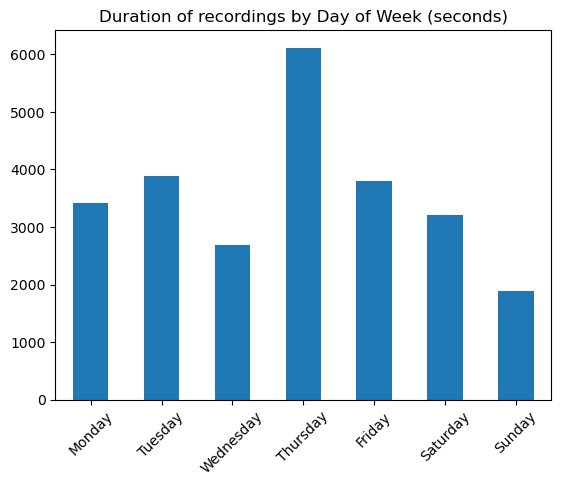

In [44]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df.groupby('day')[['duration']].sum().reindex(days).plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('')
plt.legend('', frameon=False)
plt.title('Duration of recordings by Day of Week (seconds)')
plt.show()

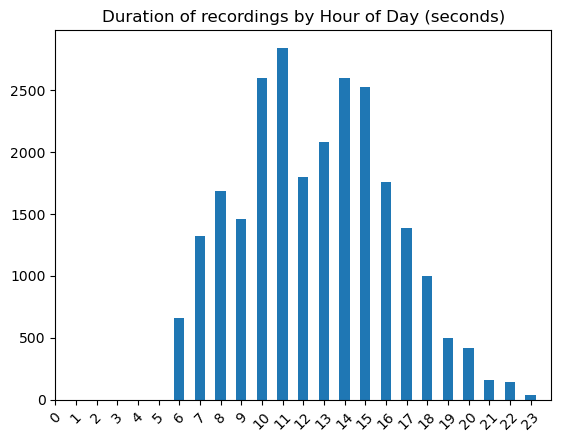

In [48]:
hours = range(0,24)
df.groupby('hour')[['duration']].sum().reindex(hours).plot(kind='bar')
plt.xlim(left=0, right=24)
plt.xticks(rotation=45)
plt.xlabel('')
plt.legend('', frameon=False)
plt.title('Duration of recordings by Hour of Day (seconds)')
plt.show()

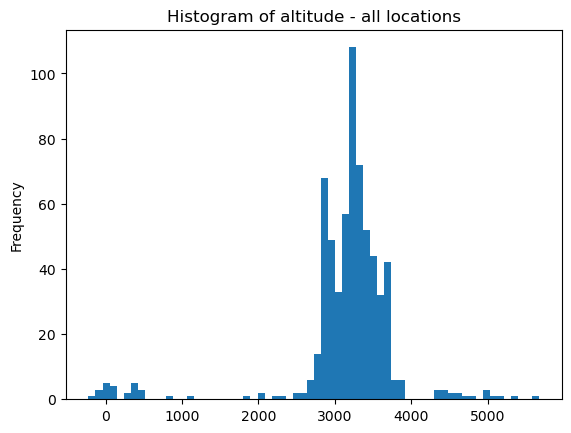

In [80]:
ac['altitude'].plot(kind='hist', bins=64)
plt.title('Histogram of altitude - all locations')
plt.show()

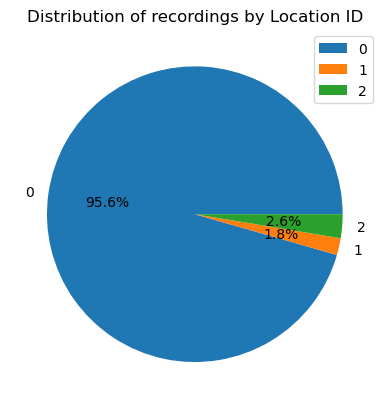

In [92]:
df.groupby('location_id')[['duration']].sum().plot.pie(subplots=True, autopct='%1.1f%%')
plt.title('Distribution of recordings by Location ID')
plt.ylabel('')
plt.show()

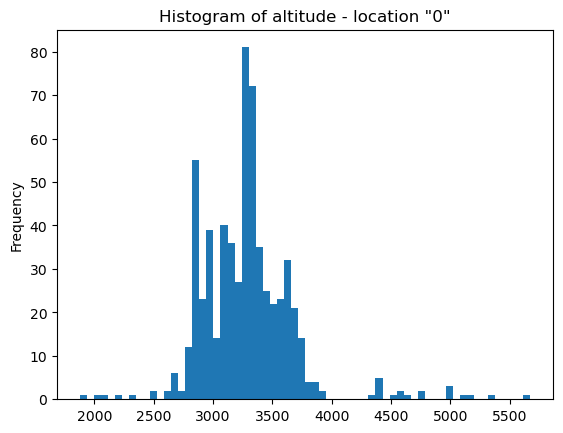

In [81]:
# Location 0
l_zero = ac[ac['location_id'] == 0]
l_zero['altitude'].plot(kind='hist', bins=64)
plt.title('Histogram of altitude - location "0"')
plt.show()

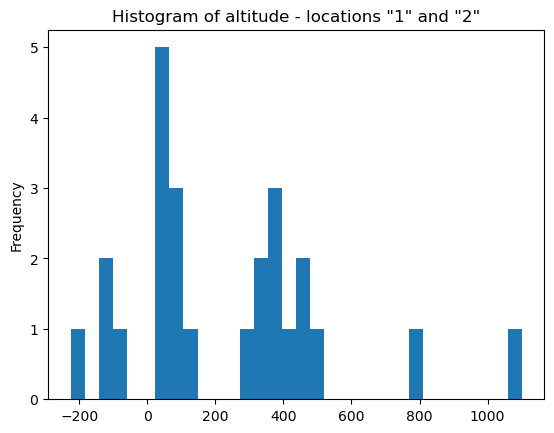

In [82]:
# Locations 1 and 2
l_two = ac[(ac['location_id'] == 2) | (ac['location_id'] == 1)]
l_two['altitude'].plot(kind='hist', bins=32)
plt.title('Histogram of altitude - locations "1" and "2"')
plt.show()

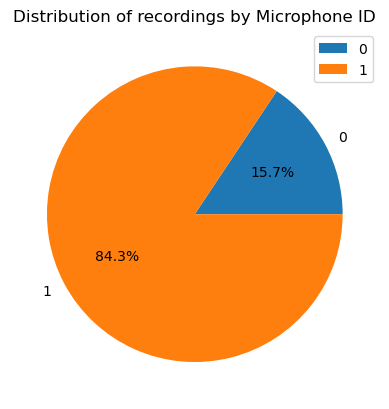

In [91]:
df.groupby('microphone_id')[['duration']].sum().plot.pie(subplots=True, autopct='%1.1f%%')
plt.title('Distribution of recordings by Microphone ID')
plt.ylabel('')
plt.show()

In [93]:
df.groupby(['train-test', 'class'])[['duration']].sum()

duration
train-test class          
test       0          1180
           1          1180
train      0         10960
           1         11660

In [94]:
df.groupby(['train-test' ,'subclass'])[['duration']].sum()

duration
train-test subclass          
test       0             1180
           1              100
           2              120
           3              940
           4               20
train      0            10960
           1              620
           2             2120
           3             8840
           4               80

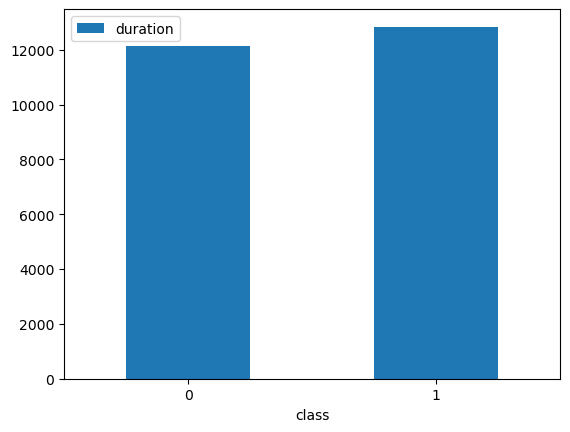

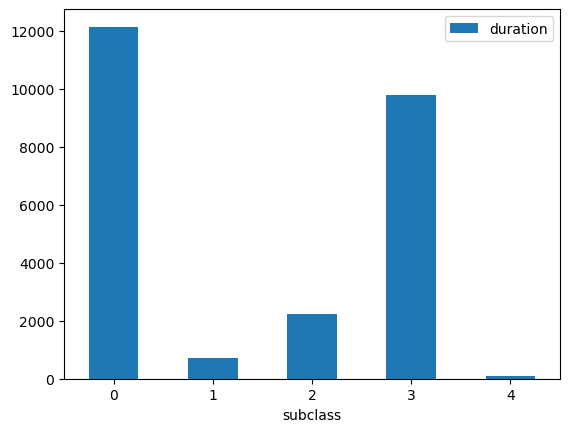

In [95]:
df.groupby('class')[['duration']].sum().plot(kind='bar')
plt.xticks(rotation=0)


df.groupby('subclass')[['duration']].sum().plot(kind='bar')
plt.xticks(rotation=0)

plt.show()